# How can I prepare the midi data to be used for machine learning

I'll work though this incrementally, 
1. Each midi file should be clustered by key signature
2. Each chord should be separated and clustered with respective chords (this could be difficult)
3. Chords should be paired with corresponding melodies (also difficult)

In [1]:
# simple bits of code I'm taking from chat gpt because that's how things work these days

import os

# walk through filenames
def print_file_names(root_dir, file_extension):
    n = 0
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.endswith(file_extension):
                n += 1
                file_path = os.path.join(dirpath, filename)
                print(file_path, n)

# Example usage:
root_directory = 'dataset/'
file_extension = '.mid'
print_file_names(root_directory, file_extension)

dataset/Lakh-MIDI-Dataset-Clean/VOF_de_Kunst/Een_kopje_koffie.mid 1
dataset/Lakh-MIDI-Dataset-Clean/Eubie_Blake/Charleston_Rag.mid 2
dataset/Lakh-MIDI-Dataset-Clean/Eubie_Blake/Chevy_Chase.mid 3
dataset/Lakh-MIDI-Dataset-Clean/Wilson,Jackie/I_Get_the_Sweetest_Feeling.mid 4
dataset/Lakh-MIDI-Dataset-Clean/Wilson,Jackie/Your_Love_Keeps_Lifting_Me_Higher_Higher.mid 5
dataset/Lakh-MIDI-Dataset-Clean/The_Escape_Club/Shake_for_the_Sheik.mid 6
dataset/Lakh-MIDI-Dataset-Clean/Morricone_Ennio/Luomo_Dellarmonica.4.mid 7
dataset/Lakh-MIDI-Dataset-Clean/Morricone_Ennio/The_Good,_the_Bad_The_Ugly.mid 8
dataset/Lakh-MIDI-Dataset-Clean/Morricone_Ennio/Luomo_Dellarmonica.2.mid 9
dataset/Lakh-MIDI-Dataset-Clean/Morricone_Ennio/Luomo_Dellarmonica.3.mid 10
dataset/Lakh-MIDI-Dataset-Clean/Morricone_Ennio/Luomo_Dellarmonica.1.mid 11
dataset/Lakh-MIDI-Dataset-Clean/Morricone_Ennio/Luomo_Dellarmonica.mid 12
dataset/Lakh-MIDI-Dataset-Clean/Honey_Cone/Want_Ads.mid 13
dataset/Lakh-MIDI-Dataset-Clean/The_Four_Ac

In [2]:
from music21 import converter, key

def get_key_of_midi_file(midi_file_path):
    # Load MIDI file
    midi_stream = converter.parse(midi_file_path)

    # Analyze key
    key_analysis = midi_stream.analyze('key')

    # Get the key name and mode
    return key_analysis.tonic.name

# Example usage:
midi_file_path = 'dataset/Lakh-MIDI-Dataset-Clean/Vaughn/Greensleeves.mid'
print(get_key_of_midi_file(midi_file_path))

F


In [3]:
#use this to get the key of each file 
# there are too many files to do this exhaustively, so I should make a list of all the files and then choose names at random until they're all gone
import random

def file_names_and_key_randomly(root_dir, file_extension, N=5, json_filename):
    list_of_keys = []
    list_of_filenames = []
    n_files = 0
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.endswith(file_extension):
                file_path = os.path.join(dirpath, filename)
                list_of_filenames.append(file_path)
                n_files += 1

    random_list = random.sample(list_of_filenames, N)
    n = 0
    for file in random_list:
        try:
            key = get_key_of_midi_file(file)
            list_of_keys.append(key)
            n += 1
            print(file, key, n)
        except: 
            print(file, 'SKIPPED')
    
    return list_of_keys, random_list
    

# Example usage:
if True:
    root_directory = 'dataset/'
    file_extension = '.mid'
    keys, files = file_names_and_key_randomly(root_directory, file_extension)

dataset/Lakh-MIDI-Dataset-Clean/Stone_Temple_Pilots/Daisy.mid E 1
dataset/Lakh-MIDI-Dataset-Clean/Bon_Jovi/Ill_Be_There_For_You.mid B 2
dataset/Lakh-MIDI-Dataset-Clean/Lunapop/50_Special.mid G 3
dataset/Lakh-MIDI-Dataset-Clean/Estefan_Gloria/Hear_My_Voice.mid G 4
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/I_Call_Your_Name.mid A 5


In [4]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_string_histogram(string_list, save_directory=None):
    # Count the occurrences of each string
    string_counts = Counter(string_list)

    # Extract labels and counts
    labels, counts = zip(*sorted(string_counts.items()))

    # Create histogram
    plt.bar(labels, counts)

    # Add labels and title
    plt.xlabel('Strings')
    plt.ylabel('Frequency')
    plt.title(save_directory.split('/')[-1])

    if save_directory is not None:    
        plt.savefig(save_directory)

    # Show the plot
    plt.show()


In [5]:
# run a few times and generate random samples
# this is a terrible way of doing it and i should be writing all the outputs to a json file. 

root_directory = 'dataset/'
file_extension = '.mid'

list_of_keys = []
list_of_files = []
for _ in range(4):
    keys, files = file_names_and_key_randomly(root_directory, file_extension, N=600)
    list_of_keys.append(keys)
    list_of_files.append(files)

dataset/Lakh-MIDI-Dataset-Clean/ABBA/Mamma_Mia.3.mid E 1
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Eleanor_Rigby.5.mid D 2
dataset/Lakh-MIDI-Dataset-Clean/Tozzi/Stella_stai.mid B- 3
dataset/Lakh-MIDI-Dataset-Clean/Zeze_di_Camargo/Redeas_do_possante.mid G 4
dataset/Lakh-MIDI-Dataset-Clean/ABBA/Im_a_Marionette.mid E 5
dataset/Lakh-MIDI-Dataset-Clean/Robert_Palmer/Ill_Be_Your_Baby_Tonight.mid F 6
dataset/Lakh-MIDI-Dataset-Clean/Die_Arzte/Schrei_nach_Liebe.mid G 7
dataset/Lakh-MIDI-Dataset-Clean/Cocciante/In_bicicletta.mid A 8
dataset/Lakh-MIDI-Dataset-Clean/Sedaka_Neil/Sunny.mid F# 9
dataset/Lakh-MIDI-Dataset-Clean/E-Rotic/Fred_Come_to_Bed.mid E 10
dataset/Lakh-MIDI-Dataset-Clean/Alan_Parsons/The_Turn_of_a_Friendly_Card.mid D 11
dataset/Lakh-MIDI-Dataset-Clean/Dave_Matthews_Band/Halloween.mid A 12
dataset/Lakh-MIDI-Dataset-Clean/Madonna/Take_A_Bow_1995_.6.mid A- 13
dataset/Lakh-MIDI-Dataset-Clean/Fleetwood_Mac/Silver_Springs.1.mid C 14
dataset/Lakh-MIDI-Dataset-Clean/Mariah_Carey/The_Ro

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=8, channel=None, data=b'Fl\x84che  '>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Gary_Moore/Friday_on_My_Mind.mid D 30
dataset/Lakh-MIDI-Dataset-Clean/Stevie_Nicks/Landslide.mid B- 31
dataset/Lakh-MIDI-Dataset-Clean/Green_Day/Only_of_You.1.mid E 32
dataset/Lakh-MIDI-Dataset-Clean/Kiss/Beth.mid C 33
dataset/Lakh-MIDI-Dataset-Clean/Pink_Floyd/Wish_You_Were_Here.3.mid E 34
dataset/Lakh-MIDI-Dataset-Clean/Celine_Dion/The_Reason.1.mid F# 35
dataset/Lakh-MIDI-Dataset-Clean/Howard_Jones/Everlasting_Love.mid C 36
dataset/Lakh-MIDI-Dataset-Clean/Wonder_Stevie/You_Are_the_Sunshine_of_My_Life.mid E 37
dataset/Lakh-MIDI-Dataset-Clean/First_Class/Beach_Baby.1.mid G 38
dataset/Lakh-MIDI-Dataset-Clean/Salt-N-Pepa/Lets_Talk_About_Sex.1.mid G 39
dataset/Lakh-MIDI-Dataset-Clean/Bob_Seger/Turn_the_Page.1.mid B 40
dataset/Lakh-MIDI-Dataset-Clean/883/Se_tornerai.2.mid D 41
dataset/Lakh-MIDI-Dataset-Clean/Genesis/One_for_the_Vine.1.mid F 42
dataset/Lakh-MIDI-Dataset-Clean/Collins_Phil/One_More_Night.5.mid E- 43
dataset/Lakh-MIDI-Dataset-Clean/Summer_Donna

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=3, channel=None, data=b'M\xe9lodie'>; getting generic Instrument
  warnings.warn(
/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent INSTRUMENT_NAME, track=3, channel=None, data=b'M\xe9lodie'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Brassens_Georges/Le_parapluie.mid C 117
dataset/Lakh-MIDI-Dataset-Clean/The_Hollies/Carrie_Ann.mid C 118
dataset/Lakh-MIDI-Dataset-Clean/Soundgarden/Black_Hole_Sun.1.mid G# 119
dataset/Lakh-MIDI-Dataset-Clean/Alien_Ant_Farm/Smooth_Criminal.mid F 120
dataset/Lakh-MIDI-Dataset-Clean/Nine_Inch_Nails/The_Perfect_Drug.mid F 121
dataset/Lakh-MIDI-Dataset-Clean/Jody_Reynolds/Endless_Sleep.mid D 122
dataset/Lakh-MIDI-Dataset-Clean/Queen/Another_One_Bites_The_Dust.2.mid C 123


/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=17, channel=None, data=b'Copyright \xa91999'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/George_Harrison/Bangladesh.mid A 124
dataset/Lakh-MIDI-Dataset-Clean/Janet_Jackson/Escapade.5.mid C# 125
dataset/Lakh-MIDI-Dataset-Clean/Oasis/Whatever.1.mid G 126
dataset/Lakh-MIDI-Dataset-Clean/Celine_Dion/Le_ballet.mid E- 127
dataset/Lakh-MIDI-Dataset-Clean/Boston/Hitch_a_Ride.mid E- 128
dataset/Lakh-MIDI-Dataset-Clean/U2/Beautiful_Day.1.mid D 129
dataset/Lakh-MIDI-Dataset-Clean/Tom_Turpin/St._Louis_Rag.mid G 130
dataset/Lakh-MIDI-Dataset-Clean/Kiss/Got_to_Choose.mid G 131
dataset/Lakh-MIDI-Dataset-Clean/Brassens_Georges/Le_Vieux_Normand.mid B 132
dataset/Lakh-MIDI-Dataset-Clean/Bee_Gees/I_Started_a_Joke.2.mid B- 133
dataset/Lakh-MIDI-Dataset-Clean/Simon_and_Garfunkel/The_59th_Street_Bridge_Song.mid B- 134
dataset/Lakh-MIDI-Dataset-Clean/Bay_City_Rollers/I_Only_Want_to_Be_With_You.mid G 135
dataset/Lakh-MIDI-Dataset-Clean/The_Smashing_Pumpkins/Today.2.mid D 136
dataset/Lakh-MIDI-Dataset-Clean/Howard_Carpendale/Mit_viel_viel_Herz.1.mid C 137
dataset/La

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Teclado B\xe1sico 1'>; getting generic Instrument
  warnings.warn(
/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Teclado B\xe1sico 2'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/U2/Babyface.mid G 140
dataset/Lakh-MIDI-Dataset-Clean/Alice_in_Chains/Dam_That_River.mid C# 141
dataset/Lakh-MIDI-Dataset-Clean/Magic_Affair/In_the_Middle_of_the_Night.mid A- 142
dataset/Lakh-MIDI-Dataset-Clean/Nas/If_I_Ruled_the_World.mid A 143
dataset/Lakh-MIDI-Dataset-Clean/Alice_in_Chains/Man_in_a_Box_live_.mid G# 144
dataset/Lakh-MIDI-Dataset-Clean/LIGABUE/Una_vita_da_mediano.1.mid G 145
dataset/Lakh-MIDI-Dataset-Clean/Wilson_Phillips/Release_Me.2.mid C 146
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Too_Much_Monkey_Business.mid F 147
dataset/Lakh-MIDI-Dataset-Clean/Bonnie_Tyler/Total_Eclipse_of_My_Heart.2.mid A- 148
dataset/Lakh-MIDI-Dataset-Clean/Madonna/Crazy_for_You.4.mid E 149
dataset/Lakh-MIDI-Dataset-Clean/Depeche_Mode/Photographic.mid A 150
dataset/Lakh-MIDI-Dataset-Clean/Sinatra/Luck_Be_a_Lady.mid F# 151
dataset/Lakh-MIDI-Dataset-Clean/Frank_Sinatra/Five_Minutes_More.mid C 152
dataset/Lakh-MIDI-Dataset-Clean/Pooh/Eleonora_mia_madre.mid A 15

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=10, channel=None, data=b'Led Zeppelin \xa9 1970'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Led_Zeppelin/Immigrant_Song.3.mid B 190
dataset/Lakh-MIDI-Dataset-Clean/Dorsey/Besame_Mucho.mid D 191
dataset/Lakh-MIDI-Dataset-Clean/Chris_Rea/Two_Roads.mid G 192


/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=3, channel=None, data=b'Sensualit\xe9'>; getting generic Instrument
  warnings.warn(
/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=6, channel=None, data=b'Strg M\x82l'>; getting generic Instrument
  warnings.warn(
/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=7, channel=None, data=b'Viol M\x82l'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Axelle_Red/Sensualite.mid F# 193
dataset/Lakh-MIDI-Dataset-Clean/Brunner_and_Brunner/Shananana_lass_uns_leben_.mid G 194
dataset/Lakh-MIDI-Dataset-Clean/U2/Hold_Me,_Thrill_Me,_Kiss_Me,_Kill_Me.mid D 195
dataset/Lakh-MIDI-Dataset-Clean/Usher/Nice_Slow.mid A- 196
dataset/Lakh-MIDI-Dataset-Clean/Def_Leppard/Photograph.1.mid A 197
dataset/Lakh-MIDI-Dataset-Clean/Kiss/Save_Your_Love.mid B 198
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Fool_on_the_Hill.mid D 199
dataset/Lakh-MIDI-Dataset-Clean/James/Red_Roses_for_a_Blue_Lady.1.mid E 200
dataset/Lakh-MIDI-Dataset-Clean/Aerosmith/Cryin.mid D 201
dataset/Lakh-MIDI-Dataset-Clean/Paul_Simon/Hazy_Shade_of_Winter.mid D 202
dataset/Lakh-MIDI-Dataset-Clean/Babyface/Change_the_World.mid A 203
dataset/Lakh-MIDI-Dataset-Clean/Backstreet_Boys/The_One.2.mid B- 204
dataset/Lakh-MIDI-Dataset-Clean/The_Beach_Boys/Surfer_Girl.2.mid G 205
dataset/Lakh-MIDI-Dataset-Clean/Willie_Nelson/Always_on_My_Mind.mid G 206
dataset/Lakh-MID

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=8, channel=None, data=b'd\xfcdel\xfc'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/The_J._Geils_Band/Freeze_Frame.mid F 256
dataset/Lakh-MIDI-Dataset-Clean/Sam_Cooke/You_Send_Me.mid C 257
dataset/Lakh-MIDI-Dataset-Clean/Biagio_Antonacci/Non_so_piu_a_chi_credere.mid D 258
dataset/Lakh-MIDI-Dataset-Clean/Pink_Floyd/The_Great_Gig_in_the_Sky.1.mid G 259


/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=14, channel=None, data=b'MORE MIDI\xb4S'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Skee-Lo/I_Wish.mid E 260
dataset/Lakh-MIDI-Dataset-Clean/Zequinha_Abreu/Tico_Tico_No_Fuba.mid G 261
dataset/Lakh-MIDI-Dataset-Clean/Fancy/Flames_of_Love.mid E 262
dataset/Lakh-MIDI-Dataset-Clean/Michele_Zarrillo/Cinque_giorni.mid C 263
dataset/Lakh-MIDI-Dataset-Clean/Eagles/Take_It_Easy.4.mid C 264
dataset/Lakh-MIDI-Dataset-Clean/Traffic/Dear_Mr._Fantasy.mid D 265
dataset/Lakh-MIDI-Dataset-Clean/Prince/Interactive.1.mid D 266
dataset/Lakh-MIDI-Dataset-Clean/Pooh/Amore_e_dintorni.1.mid B- 267
dataset/Lakh-MIDI-Dataset-Clean/The_Offspring/Nitro_Youth_Energy_.mid C# 268
dataset/Lakh-MIDI-Dataset-Clean/The_Offspring/Self_Esteem.1.mid F 269
dataset/Lakh-MIDI-Dataset-Clean/Jackson_Michael/Billy_Jean.mid B- 270
dataset/Lakh-MIDI-Dataset-Clean/Pink_Floyd/On_the_Turning_Away.mid C 271
dataset/Lakh-MIDI-Dataset-Clean/Yes/Ive_Seen_All_Good_People.1.mid B- 272
dataset/Lakh-MIDI-Dataset-Clean/Coasters/Yakety_Yak.mid F 273
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/G

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=9, channel=None, data=b'\xb8 1999 C-S-C'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/The_Allman_Brothers_Band/Melissa.mid E 275
dataset/Lakh-MIDI-Dataset-Clean/The_Dave_Clark_Five/Glad_All_Over.2.mid G 276
dataset/Lakh-MIDI-Dataset-Clean/The_Pointer_Sisters/Fire.mid F# 277
dataset/Lakh-MIDI-Dataset-Clean/Dune/Hand_in_Hand.mid C# 278
dataset/Lakh-MIDI-Dataset-Clean/Nomadi/Se_non_ho_te.mid C 279
dataset/Lakh-MIDI-Dataset-Clean/Adriano_Celentano/Azzurro.1.mid B- 280
dataset/Lakh-MIDI-Dataset-Clean/Coolio/Fantastic_Voyage.mid E 281
dataset/Lakh-MIDI-Dataset-Clean/Lynyrd_Skynyrd/Gimme_Three_Steps.mid C 282
dataset/Lakh-MIDI-Dataset-Clean/Beastie_Boys/Sabotage.mid C# 283
dataset/Lakh-MIDI-Dataset-Clean/New_Age/Spring_Waltz.mid G 284
dataset/Lakh-MIDI-Dataset-Clean/Mina/Io_e_te_da_soli.mid F 285
dataset/Lakh-MIDI-Dataset-Clean/Erasure/A_Little_Respect.2.mid C 286
dataset/Lakh-MIDI-Dataset-Clean/The_Spotnicks/Happy_Guitar.mid C 287
dataset/Lakh-MIDI-Dataset-Clean/Iron_Butterfly/In_A_Gadda_Da_Vida.1.mid C# 288
dataset/Lakh-MIDI-Dataset-Clean/Enya

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=3, channel=None, data=b'fl\x84che  '>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Sweet/Co-Co.mid G 307
dataset/Lakh-MIDI-Dataset-Clean/Elvis_Presley/Fever.mid A 308
dataset/Lakh-MIDI-Dataset-Clean/Peter_Frampton/Show_Me_the_Way.mid F 309
dataset/Lakh-MIDI-Dataset-Clean/The_Blues_Brothers/Everybody_Needs_Somebody_to_Love.2.mid F 310
dataset/Lakh-MIDI-Dataset-Clean/Frankie_Goes_to_Hollywood/Relax.2.mid A 311
dataset/Lakh-MIDI-Dataset-Clean/Emerson,_Lake_and_Palmer/Lucky_Man.mid D 312
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Dont_Let_Me_Down.3.mid E 313
dataset/Lakh-MIDI-Dataset-Clean/Genesis/I_Cant_Dance.5.mid D 314
dataset/Lakh-MIDI-Dataset-Clean/Pink_Floyd/The_Great_Gig_in_the_Sky.mid G 315
dataset/Lakh-MIDI-Dataset-Clean/Whitney_Houston/Greatest_Love_of_All.2.mid A 316
dataset/Lakh-MIDI-Dataset-Clean/Kaoma/Lambada.1.mid D 317
dataset/Lakh-MIDI-Dataset-Clean/Nine_Inch_Nails/Closer.5.mid F 318
dataset/Lakh-MIDI-Dataset-Clean/Crosby,_Stills,_Nash_and_Young/Carry_On.mid A 319
dataset/Lakh-MIDI-Dataset-Clean/The_Rolling_Stones/Miss_Yo

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'fl\xe4che'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Roxette/Spending_My_Time.2.mid E 335
dataset/Lakh-MIDI-Dataset-Clean/Scatman_John/Scatman.mid B- 336
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Maggie_Mae.1.mid G 337
dataset/Lakh-MIDI-Dataset-Clean/Peter,_Paul_and_Mary/I_Dig_Rock_and_Roll_Music.mid D 338
dataset/Lakh-MIDI-Dataset-Clean/The_Beach_Boys/Fun,_Fun,_Fun.1.mid E 339
dataset/Lakh-MIDI-Dataset-Clean/Pooh/Santa_Lucia.mid A 340
dataset/Lakh-MIDI-Dataset-Clean/Depeche_Mode/Just_Cant_Get_Enough.mid C 341
dataset/Lakh-MIDI-Dataset-Clean/Paoli/Averti_addosso.mid F 342
dataset/Lakh-MIDI-Dataset-Clean/Wax/Building_a_Bridge_to_Your_Heart.mid F# 343
dataset/Lakh-MIDI-Dataset-Clean/John_Elton/Made_in_England.mid F 344
dataset/Lakh-MIDI-Dataset-Clean/Claudia_Schmidt/Whale_Song_Farewell_to_Tarwathie.mid C 345
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Hey_Jude.mid F 346
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/The_Long_and_Winding_Road.4.mid E 347
dataset/Lakh-MIDI-Dataset-Clean/Orgy/Blue_Monday.mid D 3

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Eine kleine Nachtmusik G-dur W.A.Mozart, K.V.525 \x91\xe64\x8ay\x8f\xcd Rondo'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Wolfgang_Amadeus_Mozart/Eine_kleine_Nachtmusik.mid G 379
dataset/Lakh-MIDI-Dataset-Clean/U2/Satellite_of_Love.mid G 380
dataset/Lakh-MIDI-Dataset-Clean/Bachman-Turner_Overdrive/You_Aint_Seen_Nothin_Yet.1.mid D 381
dataset/Lakh-MIDI-Dataset-Clean/Bette_Midler/To_Deserve_You.mid F 382
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Love_Song.mid D 383
dataset/Lakh-MIDI-Dataset-Clean/Barry_Manilow/I_Made_It_Through_The_Rain.mid F 384
dataset/Lakh-MIDI-Dataset-Clean/Foreigner/Urgent.1.mid A 385
dataset/Lakh-MIDI-Dataset-Clean/Reel_Big_Fish/She_Has_a_Girlfriend_Now.mid F 386
dataset/Lakh-MIDI-Dataset-Clean/John_Elton/Your_Song.6.mid E 387
dataset/Lakh-MIDI-Dataset-Clean/Camaleonti/Viso_dangelo.mid C# 388
dataset/Lakh-MIDI-Dataset-Clean/Van_Morrison/Into_the_Mystic.3.mid D 389
dataset/Lakh-MIDI-Dataset-Clean/The_Spencer_Davis_Group/Gimme_Some_Lovin.mid C 390
dataset/Lakh-MIDI-Dataset-Clean/The_KLF/What_Time_Is_Love_LP-mix_.mid B- 391
dataset/Lakh-MIDI-Dataset-Clea

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=19, channel=None, data=b'Created by X@V\x80 \xa9'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Daniele/Neve_al_sole.1.mid G 434
dataset/Lakh-MIDI-Dataset-Clean/Rednex/Cotton_Eye_Joe.1.mid D 435
dataset/Lakh-MIDI-Dataset-Clean/Garbage/No._1_Crush.mid G 436
dataset/Lakh-MIDI-Dataset-Clean/Mosch/Eine_stille_Stunde.mid C 437
dataset/Lakh-MIDI-Dataset-Clean/Aerosmith/Amazing.mid G 438
dataset/Lakh-MIDI-Dataset-Clean/Crow_Sheryl/My_Favorite_Mistake.mid G 439
dataset/Lakh-MIDI-Dataset-Clean/The_Doobie_Brothers/Long_Train_Running.1.mid D 440
dataset/Lakh-MIDI-Dataset-Clean/Stone_Temple_Pilots/Dead_Bloated.1.mid B 441
dataset/Lakh-MIDI-Dataset-Clean/Queen/We_Are_The_Champions.4.mid F 442
dataset/Lakh-MIDI-Dataset-Clean/Journey/Open_Arms.6.mid D 443
dataset/Lakh-MIDI-Dataset-Clean/John_Elton/I_Dont_Wanna_Go_On_With_You_Like_That.3.mid A 444
dataset/Lakh-MIDI-Dataset-Clean/Fleetwood_Mac/Albatros.2.mid E 445
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Cant_Buy_Me_Love.1.mid C 446
dataset/Lakh-MIDI-Dataset-Clean/Darts/Duke_of_Earl.mid A- 447
dataset/Lakh-MIDI-

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=3, channel=None, data=b'bl\x84ser  '>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Aswad/Shine.mid G 468
dataset/Lakh-MIDI-Dataset-Clean/Edvard_Grieg/Peer_Gynt_Suite_No._1,_Op._46_I._Morning_Mood.mid E 469
dataset/Lakh-MIDI-Dataset-Clean/Sedaka_Neil/Oh_Carol.1.mid B 470
dataset/Lakh-MIDI-Dataset-Clean/Billy_Joel/Shameless.mid C 471
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Eight_Days_A_Week.6.mid G 472
dataset/Lakh-MIDI-Dataset-Clean/U2/Pride.7.mid E 473
dataset/Lakh-MIDI-Dataset-Clean/Little_Eva/Locomotion.mid D 474
dataset/Lakh-MIDI-Dataset-Clean/Sailor/A_Glass_of_Champagne.mid G 475
dataset/Lakh-MIDI-Dataset-Clean/Billy_Ocean/Suddenly.mid B- 476
dataset/Lakh-MIDI-Dataset-Clean/Mariah_Carey/Breakdown.mid F# 477
dataset/Lakh-MIDI-Dataset-Clean/ABBA/Hasta_Manana.mid G 478
dataset/Lakh-MIDI-Dataset-Clean/Christopher_Cross/Arthurs_Theme_Best_That_You_Can_Do_.2.mid A 479
dataset/Lakh-MIDI-Dataset-Clean/The_Mamas_and_The_Papas/Monday_Monday.mid G 480
dataset/Lakh-MIDI-Dataset-Clean/Roxette/How_Do_You_Do.4.mid F 481
dataset/Lakh-MIDI-Data

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=7, channel=None, data=b'Fl\x9ete'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/The_Cranberries/Cordell.mid A 578
dataset/Lakh-MIDI-Dataset-Clean/U2/The_Electric_Co..1.mid B 579
dataset/Lakh-MIDI-Dataset-Clean/Pooh/Il_Giorno_Prima.1.mid A 580
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Anytime_at_All.mid D 581
dataset/Lakh-MIDI-Dataset-Clean/Queen/Good_Old_Fashioned_Lover_Boy.1.mid E- 582
dataset/Lakh-MIDI-Dataset-Clean/Jethro_Tull/Locomotive_Breath.2.mid E 583
dataset/Lakh-MIDI-Dataset-Clean/De_Migra_s/Het_stadje_Kufstein.mid B- 584
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/She_Loves_You.3.mid G 585
dataset/Lakh-MIDI-Dataset-Clean/The_Police/Every_Breath_You_Take.mid A 586
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/In_My_Life.1.mid G 587
dataset/Lakh-MIDI-Dataset-Clean/Miller/Moonlight_Serenade.3.mid E- 588
dataset/Lakh-MIDI-Dataset-Clean/Bert_Heerink/Julie_July_Brother_Louie_.mid D 589
dataset/Lakh-MIDI-Dataset-Clean/Celine_Dion/I_Dont_Know.mid E 590
dataset/Lakh-MIDI-Dataset-Clean/Michael_George/Wake_Me_Up_Before_You_Go_Go.mid

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'M\xe9lodie'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Brassens_Georges/Les_Quatre_Bacheliers.mid D 593
dataset/Lakh-MIDI-Dataset-Clean/Tozzi/Ti_amo.mid A 594
dataset/Lakh-MIDI-Dataset-Clean/Nancy_Sinatra/These_Boots_Are_Made_for_Walkin.2.mid C 595
dataset/Lakh-MIDI-Dataset-Clean/Norman_Greenbaum/Spirit_in_the_Sky.mid C 596
dataset/Lakh-MIDI-Dataset-Clean/Journey/Send_Her_My_Love.1.mid A 597
dataset/Lakh-MIDI-Dataset-Clean/Sublime/Hope_Work_That_We_Do_DJs.mid C 598
dataset/Lakh-MIDI-Dataset-Clean/Sting/Every_Breath_You_Take.2.mid A- 1
dataset/Lakh-MIDI-Dataset-Clean/The_Smashing_Pumpkins/Disarm.1.mid C 2
dataset/Lakh-MIDI-Dataset-Clean/Howard_Carpendale/Nachts_wenn_alles_schlaft.mid B- 3
dataset/Lakh-MIDI-Dataset-Clean/Lewis_George/Bill_Bailey.mid G 4
dataset/Lakh-MIDI-Dataset-Clean/Wilson_Pickett/Knock_on_Wood.mid A 5
dataset/Lakh-MIDI-Dataset-Clean/Alanis_Morissette/The_Couch.mid A 6


/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=17, channel=None, data=b'\xa9 1969'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Led_Zeppelin/What_Is_and_What_Should_Never_Be.mid A 7
dataset/Lakh-MIDI-Dataset-Clean/Humperdinck_Engelbert/The_Spanish_Night_Is_Over.1.mid E 8
dataset/Lakh-MIDI-Dataset-Clean/Billy_Crash_Craddock/Sea_Cruise.mid B- 9
dataset/Lakh-MIDI-Dataset-Clean/Brassens_Georges/Saturne.mid F# 10
dataset/Lakh-MIDI-Dataset-Clean/Sonny_and_Cher/I_Got_You_Babe.mid B- 11
dataset/Lakh-MIDI-Dataset-Clean/Metallica/Master_of_Puppets.1.mid E 12
dataset/Lakh-MIDI-Dataset-Clean/Boney_M./Marys_Boy_Child_Oh_My_Lord.mid B- 13
dataset/Lakh-MIDI-Dataset-Clean/Crash_Test_Dummies/Mmm_Mmm_Mmm.mid E- 14
dataset/Lakh-MIDI-Dataset-Clean/The_Corrs/Old_Town.mid E 15
dataset/Lakh-MIDI-Dataset-Clean/Estefan_Gloria/Dont_Wanna_Lose_You.1.mid E- 16
dataset/Lakh-MIDI-Dataset-Clean/Bread/Diary.1.mid G 17
dataset/Lakh-MIDI-Dataset-Clean/Energy_52/Cafe_del_Mar.mid B- 18
dataset/Lakh-MIDI-Dataset-Clean/Santana/Smooth.1.mid A 19
dataset/Lakh-MIDI-Dataset-Clean/a-ha/Hunting_High_and_Low.mid D 20
datase

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'\xff Sequenced 1997 by'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Helen_Reddy/Aint_No_Way_to_Treat_a_Lady.mid C 27
dataset/Lakh-MIDI-Dataset-Clean/Crow_Sheryl/Strong_Enough.mid G 28
dataset/Lakh-MIDI-Dataset-Clean/Masini/Raccontami_di_Te.1.mid D 29
dataset/Lakh-MIDI-Dataset-Clean/Earth,_Wind_and_Fire/Fantasy.5.mid E 30
dataset/Lakh-MIDI-Dataset-Clean/Christina_Aguilera/Genie_In_a_Bottle.1.mid F 31
dataset/Lakh-MIDI-Dataset-Clean/Bruce_Hornsby_and_The_Range/The_Way_It_Is.mid C 32
dataset/Lakh-MIDI-Dataset-Clean/ABBA/Hey,_Hey_Helen.1.mid G 33
dataset/Lakh-MIDI-Dataset-Clean/U2/Pride.4.mid E 34
dataset/Lakh-MIDI-Dataset-Clean/Biagio_Antonacci/Happy_Family.mid B 35
dataset/Lakh-MIDI-Dataset-Clean/Ray_Parker_Jr./I_Dont_Think_That_Man_Should_Sleep_Alone.mid B- 36
dataset/Lakh-MIDI-Dataset-Clean/Mariah_Carey/Alone_in_Love.mid E- 37
dataset/Lakh-MIDI-Dataset-Clean/Hanson/Man_From_Milwaukee_Garage_mix_.mid D 38
dataset/Lakh-MIDI-Dataset-Clean/Nine_Inch_Nails/The_Becoming.1.mid C 39
dataset/Lakh-MIDI-Dataset-Clean/Supermax/Love_

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=1, channel=None, data=b'\x81uTo Love You More\x81v      (GS)  By T.MONDEN (MIUMIU)'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Celine_Dion/To_Love_You_More.1.mid A 86
dataset/Lakh-MIDI-Dataset-Clean/Masini/Vaffanculo.4.mid D 87
dataset/Lakh-MIDI-Dataset-Clean/Roberta_Flack/Where_Is_the_Love.mid E- 88
dataset/Lakh-MIDI-Dataset-Clean/The_Beach_Boys/Sail_On_Sailor.mid C 89
dataset/Lakh-MIDI-Dataset-Clean/Paul_Young/Every_Time_You_Go_Away.3.mid F 90
dataset/Lakh-MIDI-Dataset-Clean/Raf/Self_Control.mid F 91
dataset/Lakh-MIDI-Dataset-Clean/Claude_Debussy/Golliwogs_Cake_Walk.mid B- 92
dataset/Lakh-MIDI-Dataset-Clean/Blind_Melon/No_Rain.mid A 93
dataset/Lakh-MIDI-Dataset-Clean/Bread/Everything_I_Own.mid D 94
dataset/Lakh-MIDI-Dataset-Clean/Pooh/Se_balla_da_sola.2.mid A 95
dataset/Lakh-MIDI-Dataset-Clean/Gilbert_O_Sullivan/Clair.3.mid A- 96
dataset/Lakh-MIDI-Dataset-Clean/Genesis/Thats_All.1.mid E 97
dataset/Lakh-MIDI-Dataset-Clean/Metallica/Fade_to_Black.2.mid E 98
dataset/Lakh-MIDI-Dataset-Clean/Wonder_Stevie/Do_I_Do.mid F# 99
dataset/Lakh-MIDI-Dataset-Clean/Amy_Grant/Stay_for_a_While.

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'\xc9 dez, \xe9 cem, \xe9 mil '>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Rick/E_Dez_E_Cem_E_Mil.mid G 226
dataset/Lakh-MIDI-Dataset-Clean/MC_Hammer/Cant_Touch_This.1.mid G 227
dataset/Lakh-MIDI-Dataset-Clean/Van_Halen/Jump.9.mid C 228
dataset/Lakh-MIDI-Dataset-Clean/Marc_Cohn/Walking_In_Memphis.mid D 229
dataset/Lakh-MIDI-Dataset-Clean/Backstreet_Boys/As_Long_as_You_Love_Me.2.mid C 230
dataset/Lakh-MIDI-Dataset-Clean/Bread/If.1.mid A 231
dataset/Lakh-MIDI-Dataset-Clean/The_Four_Seasons/Our_Day_Will_Come.mid G 232
dataset/Lakh-MIDI-Dataset-Clean/Pagliaro/Dangereux.mid E 233
dataset/Lakh-MIDI-Dataset-Clean/Rush/The_Big_Money.mid F# 234
dataset/Lakh-MIDI-Dataset-Clean/Madonna/Vogue.2.mid G 235
dataset/Lakh-MIDI-Dataset-Clean/Joshua_Kadison/Beautiful_In_My_Eyes.mid E- 236
dataset/Lakh-MIDI-Dataset-Clean/Scatman_John/Scatmans_World.mid D 237
dataset/Lakh-MIDI-Dataset-Clean/Celine_Dion/My_Heart_Will_Go_On.3.mid E 238
dataset/Lakh-MIDI-Dataset-Clean/Steve_Winwood/Higher_Love.1.mid F 239
dataset/Lakh-MIDI-Dataset-Clean/LIGABUE/Sogni_

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=12, channel=None, data=b'\xb8 1999 C-S-C'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/The_Allman_Brothers_Band/Jessica.3.mid D 289
dataset/Lakh-MIDI-Dataset-Clean/Jovanotti/Serenata_Rap.3.mid B 290
dataset/Lakh-MIDI-Dataset-Clean/The_Cars/Lets_Go.2.mid D 291
dataset/Lakh-MIDI-Dataset-Clean/Hootie_and_the_Blowfish/Only_Wanna_Be_With_You.mid F# 292
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Im_A_Loser.1.mid G 293
dataset/Lakh-MIDI-Dataset-Clean/Ozzy_Osbourne/Crazy_Train.mid D 294
dataset/Lakh-MIDI-Dataset-Clean/Wonder_Stevie/I_Just_Called_to_Say_I_Love_You.1.mid C 295
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/All_Together_Now.mid G 296
dataset/Lakh-MIDI-Dataset-Clean/883/Nessun_rimpianto.1.mid F 297
dataset/Lakh-MIDI-Dataset-Clean/Bad_Company/Shooting_Star.mid A 298
dataset/Lakh-MIDI-Dataset-Clean/Paula_Cole/Where_Have_All_the_Cowboys_Gone.1.mid F# 299
dataset/Lakh-MIDI-Dataset-Clean/Sinatra/Anything_Goes.1.mid C# 300
dataset/Lakh-MIDI-Dataset-Clean/Pooh/Storia_di_una_lacrima.mid A 301
dataset/Lakh-MIDI-Dataset-Clean/Kim_Wilde/You_Keep_M

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'maryn =\xfe'>; getting generic Instrument
  warnings.warn(
/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=6, channel=None, data=b'\xa92000'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Christina_Aguilera/I_Turn_to_You.mid C# 314
dataset/Lakh-MIDI-Dataset-Clean/Bread/Make_It_With_You.3.mid E 315
dataset/Lakh-MIDI-Dataset-Clean/No_Doubt/Dont_Speak.2.mid F 316
dataset/Lakh-MIDI-Dataset-Clean/Marc_Anthony/Vivir_Lo_Nuestro.mid F 317
dataset/Lakh-MIDI-Dataset-Clean/Daniele/Anima.mid F 318
dataset/Lakh-MIDI-Dataset-Clean/Whiteman_Paul_and_His_Orchestra/Sweet_Sue,_Just_You.mid G 319
dataset/Lakh-MIDI-Dataset-Clean/Thin_Lizzy/Boys_Are_Back_in_Town.mid A- 320
dataset/Lakh-MIDI-Dataset-Clean/Bruce_Hornsby_and_The_Range/Look_Out_Any_Window.mid E 321
dataset/Lakh-MIDI-Dataset-Clean/Shelley_Fabares/Johnny_Angel.mid G 322
dataset/Lakh-MIDI-Dataset-Clean/Erasure/Take_Me_Back.1.mid C 323
dataset/Lakh-MIDI-Dataset-Clean/Tom_Jones/Delilah.2.mid E 324
dataset/Lakh-MIDI-Dataset-Clean/McCartney/Silly_Love_Songs.mid C 325
dataset/Lakh-MIDI-Dataset-Clean/LIGABUE/Libera_nos_a_malo.2.mid D 326
dataset/Lakh-MIDI-Dataset-Clean/John_Elton/Madman_Across_the_Water.m

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Bodhr\xe0n'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/The_Corrs/Carraroe_Jig.mid D 350
dataset/Lakh-MIDI-Dataset-Clean/Commodores/Easy.mid A- 351
dataset/Lakh-MIDI-Dataset-Clean/Commodores/Easy.1.mid A- 352
dataset/Lakh-MIDI-Dataset-Clean/The_Doors/Love_Her_Madly.2.mid A 353
dataset/Lakh-MIDI-Dataset-Clean/Dave_Matthews_Band/Dont_Drink_the_Water.mid G 354
dataset/Lakh-MIDI-Dataset-Clean/Cornelius_Brothers/Its_Too_Late_to_Turn_Back_Now.mid E 355
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Penny_Lane.3.mid C 356
dataset/Lakh-MIDI-Dataset-Clean/Enya/Fairytale.mid C 357
dataset/Lakh-MIDI-Dataset-Clean/Green_Day/When_I_Come_Around.1.mid F# 358
dataset/Lakh-MIDI-Dataset-Clean/Gershwin/Gershwin_Medley.mid C 359
dataset/Lakh-MIDI-Dataset-Clean/Barry_and_Eileen/Ibiza.mid A 360
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/I_Feel_Fine.2.mid G 361
dataset/Lakh-MIDI-Dataset-Clean/Simon_and_Garfunkel/Bridge_Over_Troubled_Water.3.mid E- 362
dataset/Lakh-MIDI-Dataset-Clean/U2/Pride.7.mid E 363
dataset/Lakh-MIDI-Dataset-Clea

/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'\x83z\x83E\x83_\x83E\x83\x93  \x81@\x81@\x82d\x82k\x81\x95\x82o                                        '>; getting generic Instrument
  warnings.warn(
/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=1, channel=None, data=b'\x83e\x83\x93\x83|                              '>; getting generic Instrument
  warnings.warn(
/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=2, channel=None, data

dataset/Lakh-MIDI-Dataset-Clean/Emerson,_Lake_and_Palmer/Hoedown.mid G 94
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/Step_Inside_Love_Los_Paranoias.mid F 95
dataset/Lakh-MIDI-Dataset-Clean/DJ_BoBo/Everybody.mid F# 96
dataset/Lakh-MIDI-Dataset-Clean/Brooks_Garth/The_Beaches_of_Cheyenne.mid C 97
dataset/Lakh-MIDI-Dataset-Clean/McCartney/Ebony_and_Ivory.mid E 98
dataset/Lakh-MIDI-Dataset-Clean/The_The_Kingston_Trio/Allentown_Jail.mid C# 99
dataset/Lakh-MIDI-Dataset-Clean/Sandy_Denny/The_Lady.mid A 100
dataset/Lakh-MIDI-Dataset-Clean/Humperdinck_Engelbert/Portofino.2.mid C# 101
dataset/Lakh-MIDI-Dataset-Clean/Eagles/I_Cant_Tell_You_Why.3.mid A 102
dataset/Lakh-MIDI-Dataset-Clean/Kate_Bush/Cloudbusting.1.mid B 103
dataset/Lakh-MIDI-Dataset-Clean/Godsmack/Whatever.mid C# 104
dataset/Lakh-MIDI-Dataset-Clean/Oliver/Good_Morning_Starshine.mid G 105
dataset/Lakh-MIDI-Dataset-Clean/Backstreet_Boys/Spanish_Eyes.1.mid B- 106
dataset/Lakh-MIDI-Dataset-Clean/Paoli/Mi_sono_innamorato_di_te.mid F 107


/Users/ciaranmaloy/Documents/ML Projects/Midi-generation/.venv/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Lene G./Ren\xe9 Dif'>; getting generic Instrument
  warnings.warn(


dataset/Lakh-MIDI-Dataset-Clean/Aqua/My_Oh_My.2.mid D 109
dataset/Lakh-MIDI-Dataset-Clean/Kiss/God_of_Thunder.mid C 110
dataset/Lakh-MIDI-Dataset-Clean/Nirvana/School.mid A 111
dataset/Lakh-MIDI-Dataset-Clean/Village_People/Y.M.C.A..1.mid F# 112
dataset/Lakh-MIDI-Dataset-Clean/Prince_Ital_Joe/Life_in_the_Streets_Street_mix_.mid E- 113
dataset/Lakh-MIDI-Dataset-Clean/U2/Stay_Faraway,_So_Close_.mid A- 114
dataset/Lakh-MIDI-Dataset-Clean/The_Beatles/The_Word.mid D 115
dataset/Lakh-MIDI-Dataset-Clean/Aerosmith/Janies_Got_a_Gun.4.mid F# 116
dataset/Lakh-MIDI-Dataset-Clean/Sonny_and_Cher/The_Beat_Goes_On.2.mid C 117
dataset/Lakh-MIDI-Dataset-Clean/Michael_Bolton/How_Can_We_Be_Lovers.1.mid B- 118
dataset/Lakh-MIDI-Dataset-Clean/Chris_de_Burgh/Lady_in_Red.1.mid B- 119
dataset/Lakh-MIDI-Dataset-Clean/BOWIE_DAVID/Under_Pressure.mid D 120
dataset/Lakh-MIDI-Dataset-Clean/Neil_Young/Heart_of_Gold.mid C 121
dataset/Lakh-MIDI-Dataset-Clean/Chuck_Berry/Maybelline.mid B- 122
dataset/Lakh-MIDI-Dataset-C

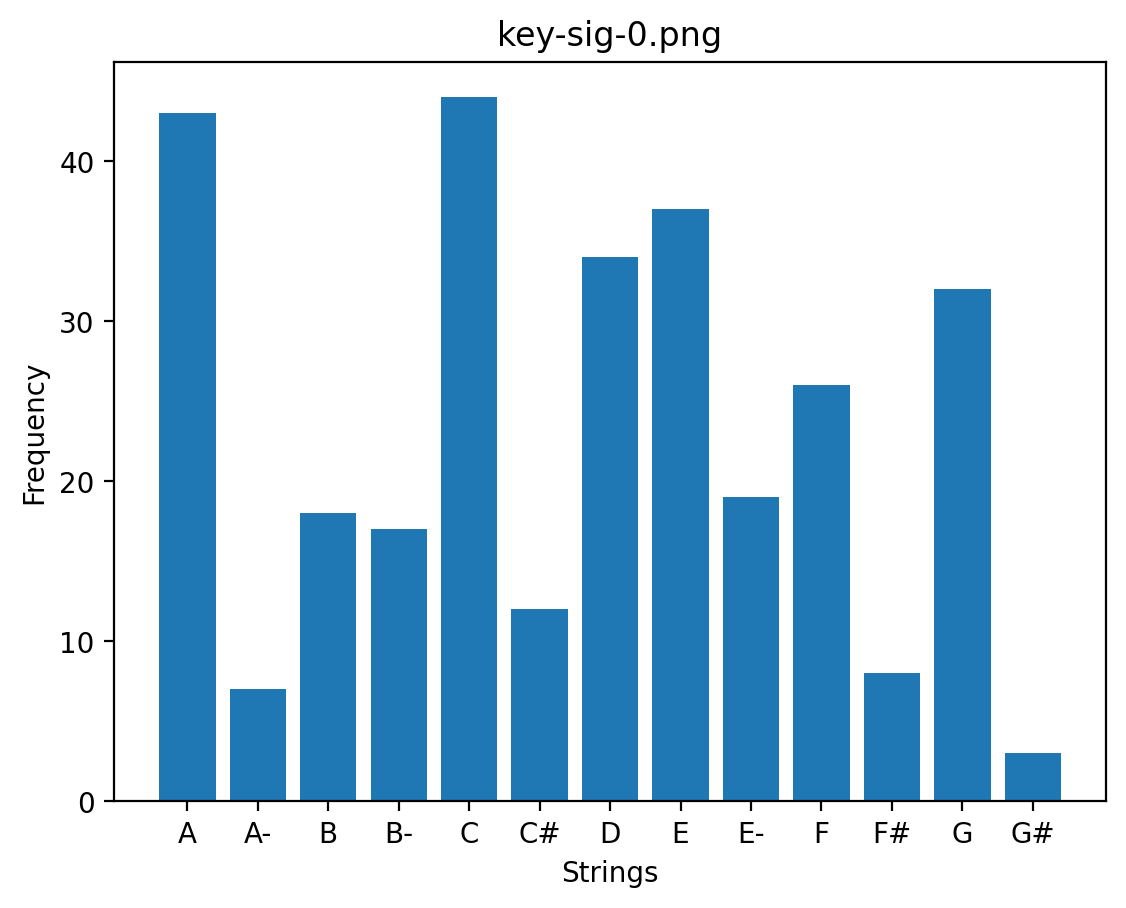

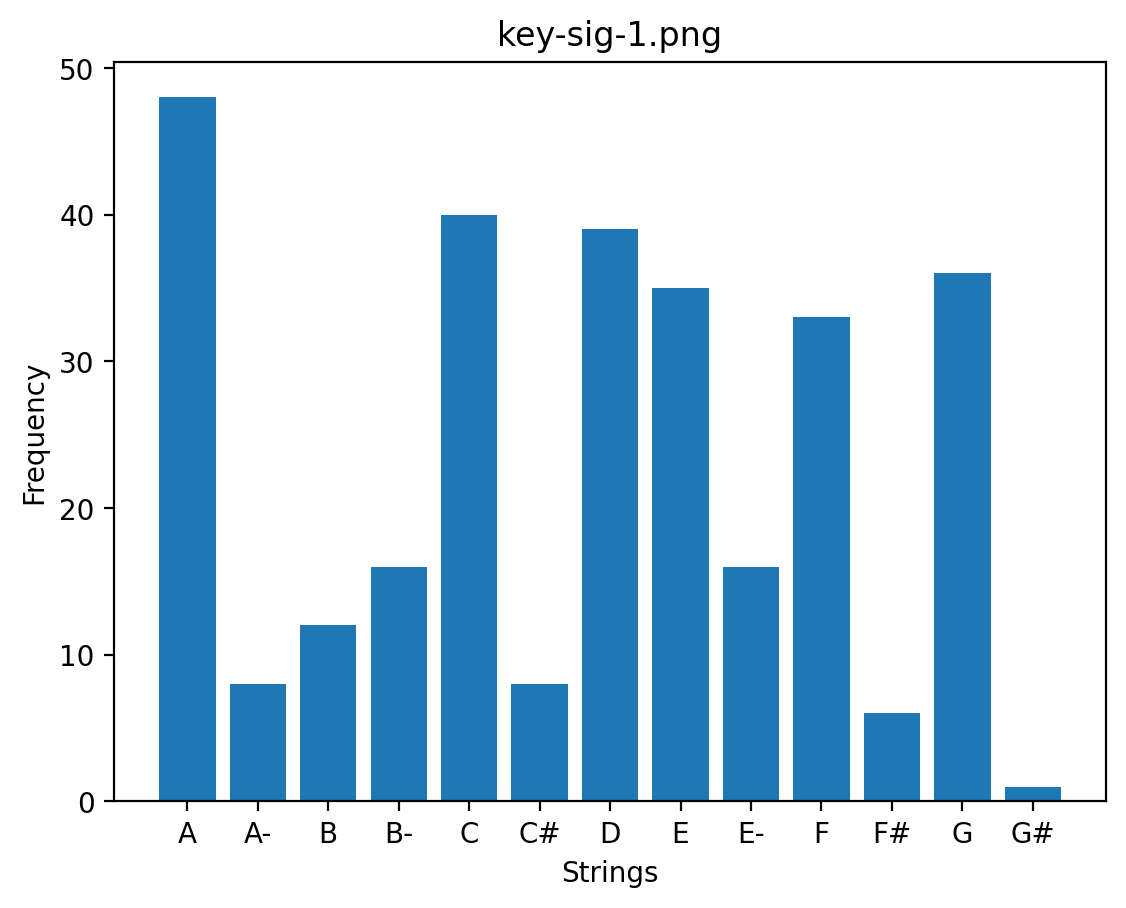

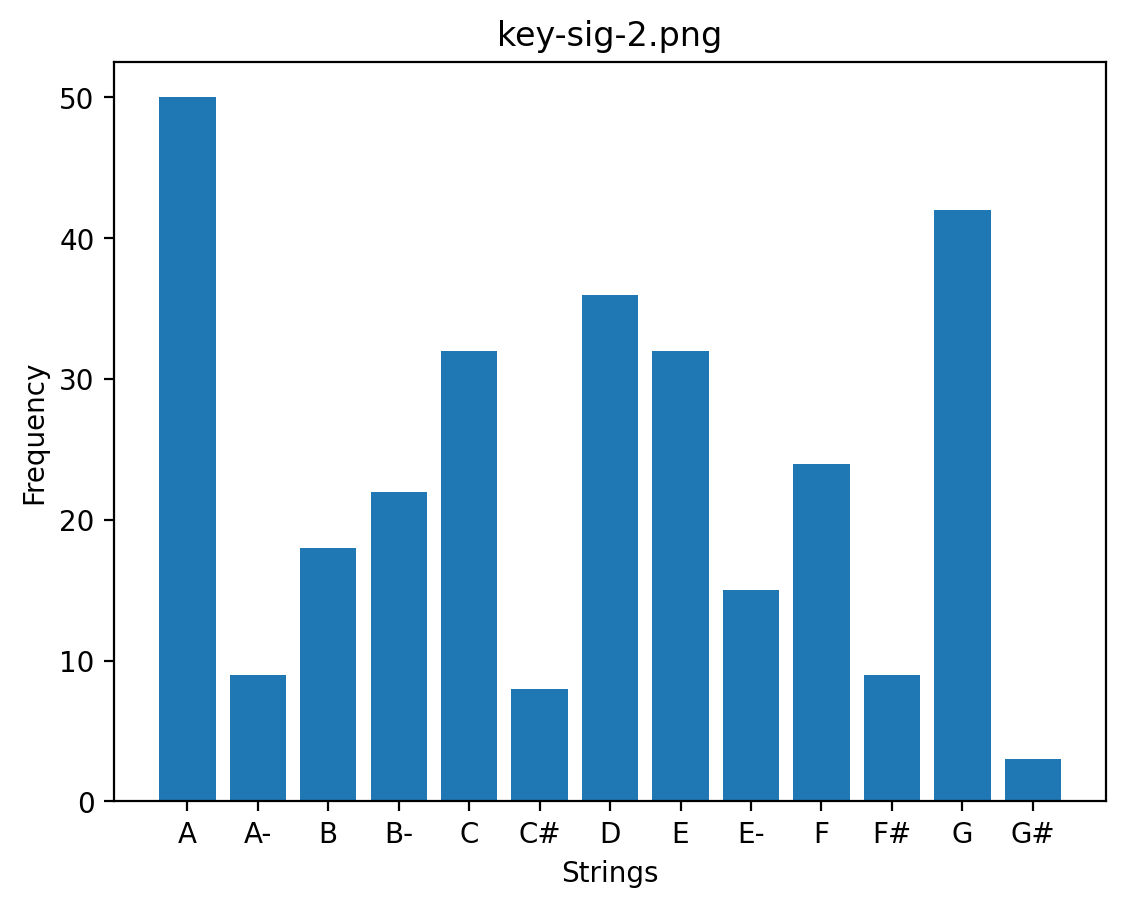

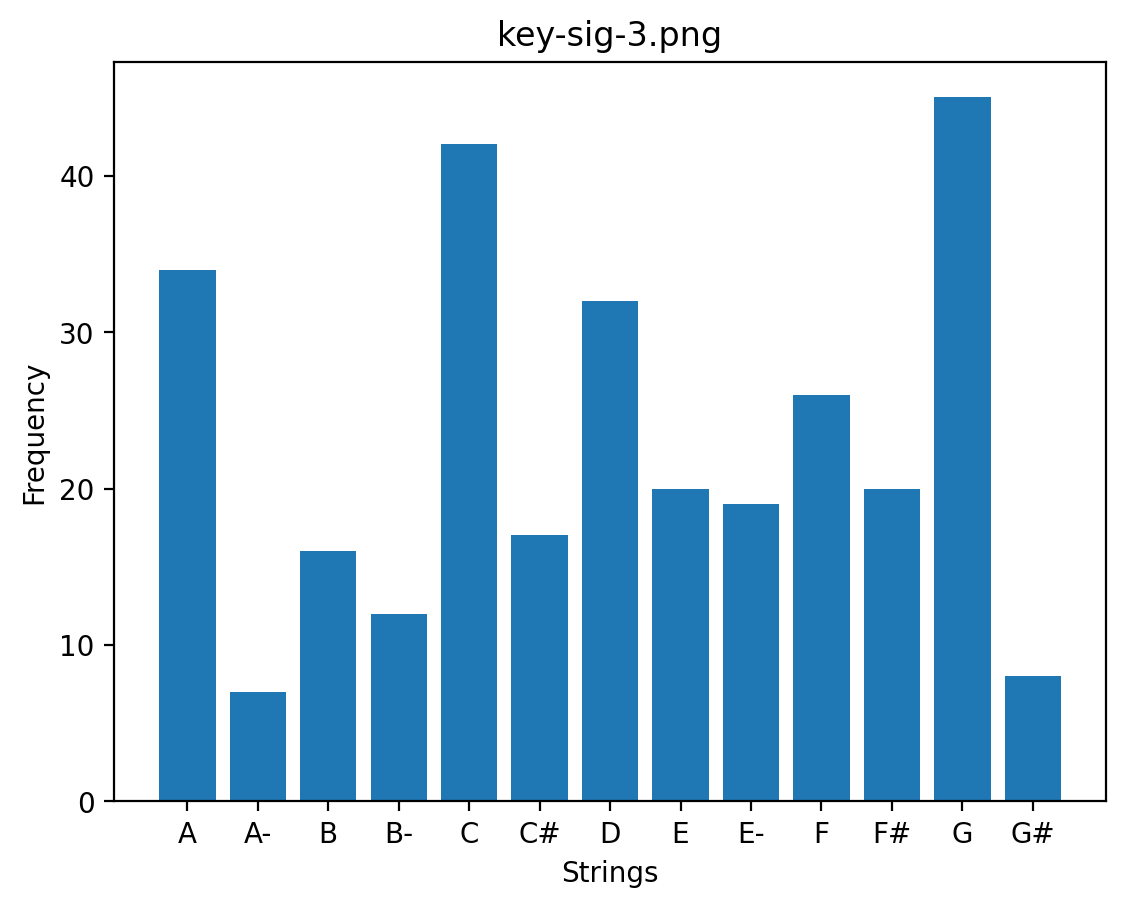

In [18]:
for i in range(len(list_of_keys)):
    plot_string_histogram(list_of_keys[i], f'Results/key-signatures/key-sig-{i}.png')

# save list of keys and list of files
import json

with open('Results/key-signatures/list-of-keys-and-files.json', 'w') as f:
    json.dump({'keys': list_of_keys, 'files': list_of_files}, f)

# Results

I should run this for more iterations per sampling since only 1200 of the 17232 songs have been analyzed. 
However from initial results show that the keys used are normally A, C, D, E, F and G, which is to be expected really. 
Thats only 7% of the total files.